In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

plt.gray()

2022-10-29 13:06:13.469447: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


<Figure size 432x288 with 0 Axes>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


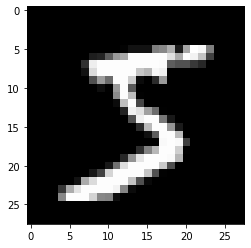

5


In [4]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [5]:
_, height, width = x_train.shape

print('height = ', height, 'width = ', width)

height =  28 width =  28


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
print(tf.reduce_min(x_train), tf.reduce_max(x_train))

tf.Tensor(0.0, shape=(), dtype=float64) tf.Tensor(1.0, shape=(), dtype=float64)


In [9]:
y_train_onehot = tf.one_hot(y_train, 10)
y_test_onehot = tf.one_hot(y_test, 10)

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_onehot))

train_dataset = train_dataset.shuffle(x_train.shape[0], reshuffle_each_iteration=True)
test_dataset = test_dataset.shuffle(x_test.shape[0], reshuffle_each_iteration=True)

train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(32)

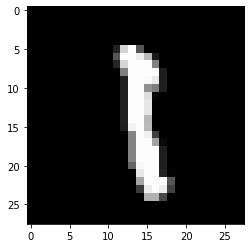

tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [12]:
for x,y in train_dataset.take(1):
    plt.imshow(x[0])
    plt.show()
    
    print(y[0])

In [13]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros')(x)

logreg_model = tf.keras.Model(input_im, x)

logreg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
logreg_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics='accuracy')

In [15]:
history_logreg = logreg_model.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
 167/1875 [=>............................] - ETA: 1s - loss: 1.7042 - accuracy: 0.6927

2022-10-29 14:46:16.500415: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.7658 - accuracy: 0.8400 - val_loss: 0.4764 - val_accuracy: 0.8835
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4528 - accuracy: 0.8830 - val_loss: 0.3974 - val_accuracy: 0.8966
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4009 - accuracy: 0.8922 - val_loss: 0.3648 - val_accuracy: 0.9029
Epoch 4/20
1875/1875 [==============================] - 2s 996us/step - loss: 0.3750 - accuracy: 0.8978 - val_loss: 0.3465 - val_accuracy: 0.9068
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3584 - accuracy: 0.9016 - val_loss: 0.3338 - val_accuracy: 0.9105
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3469 - accuracy: 0.9040 - val_loss: 0.3254 - val_accuracy: 0.9106
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3380 - accuracy: 0.9062 - val_loss: 0.3187 - val_accuracy: 0.9129
E

In [19]:
[wx,wc] = logreg_model.layers[-1].get_weights()

In [33]:
import numpy as np
np.mean(np.abs(wx))

0.06869104

In [32]:
np.mean(np.abs(wc))

0.4040615

In [24]:
wx.shape

(784, 10)

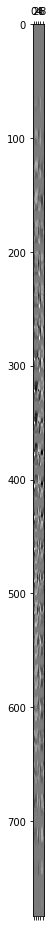

In [25]:
plt.matshow(wx)

In [34]:
def plot_history(h):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

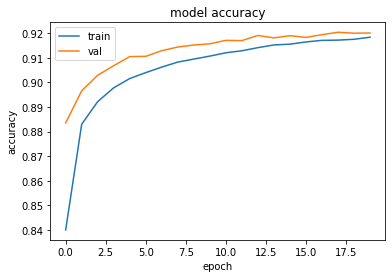

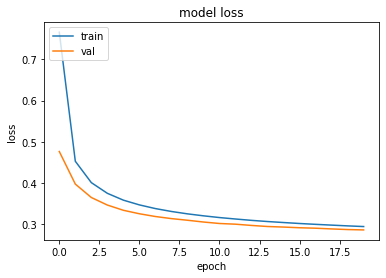

In [35]:
plot_history(history_logreg)

In [36]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(250, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal())(x)
x = tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal())(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal())(x)

dummy_deep_model = tf.keras.Model(input_im, x)

dummy_deep_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               196250    
                                                                 
 dense_2 (Dense)             (None, 100)               25100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


In [37]:
dummy_deep_model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics='accuracy')

In [38]:
history_dummy_deep_model = dummy_deep_model.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1599 - accuracy: 0.3968 - val_loss: 1.9283 - val_accuracy: 0.6452
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5409 - accuracy: 0.6949 - val_loss: 1.1393 - val_accuracy: 0.7632
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9350 - accuracy: 0.7890 - val_loss: 0.7565 - val_accuracy: 0.8213
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6813 - accuracy: 0.8315 - val_loss: 0.5884 - val_accuracy: 0.8509
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5566 - accuracy: 0.8578 - val_loss: 0.4961 - val_accuracy: 0.8733
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4837 - accuracy: 0.8722 - val_loss: 0.4389 - val_accuracy: 0.8875
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4369 - accuracy: 0.8825 - val_loss: 0.4011 - val_accuracy:

In [41]:
train_dataset_ae = train_dataset.unbatch().map(lambda x,y: (x,x)).batch(32)
test_dataset_ae = test_dataset.unbatch().map(lambda x,y: (x,x)).batch(32)

In [51]:
input_im = tf.keras.Input(shape=(height, width))
flat_im = tf.keras.layers.Flatten()(input_im)
encoder_l1 = tf.keras.layers.Dense(250, activation='sigmoid', kernel_initializer='zeros')
decoder_l1 = tf.keras.layers.Dense(flat_im.shape[-1], activation='sigmoid', kernel_initializer='zeros')
xo = decoder_l1(encoder_l1(flat_im))
xo = tf.keras.layers.Reshape((height, width))(xo)
# x = tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='zeros')(x)
# x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros')(x)

dummy_deep_model_ae_1 = tf.keras.Model(input_im, xo)

dummy_deep_model_ae_1.summary()

dummy_deep_model_ae_1.compile(
    optimizer='sgd',
    loss='mse')

dummy_deep_model_ae_1.fit(train_dataset_ae, validation_data = test_dataset_ae, epochs = 20)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 250)               196250    
                                                                 
 dense_33 (Dense)            (None, 784)               196784    
                                                                 
 reshape_8 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 393,034
Trainable params: 393,034
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================

In [55]:
input_im = tf.keras.Input(shape=(height, width))
flat_im = tf.keras.layers.Flatten()(input_im)
encoder_l2 = tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='zeros')
decoder_l2 = tf.keras.layers.Dense(250, activation='sigmoid', kernel_initializer='zeros')
xo = decoder_l1(decoder_l2(encoder_l2(encoder_l1(flat_im))))
xo = tf.keras.layers.Reshape((height, width))(xo)
# x = tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='zeros')(x)
# x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros')(x)

decoder_l1.trainable = False
encoder_l1.trainable = False

dummy_deep_model_ae_2 = tf.keras.Model(input_im, xo)

dummy_deep_model_ae_2.summary()

dummy_deep_model_ae_2.compile(
    optimizer='sgd',
    loss='mse')

dummy_deep_model_ae_2.fit(train_dataset_ae, validation_data = test_dataset_ae, epochs = 20)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 250)               196250    
                                                                 
 dense_40 (Dense)            (None, 100)               25100     
                                                                 
 dense_41 (Dense)            (None, 250)               25250     
                                                                 
 dense_33 (Dense)            (None, 784)               196784    
                                                                 
 reshape_11 (Reshape)        (None, 28, 28)            0  

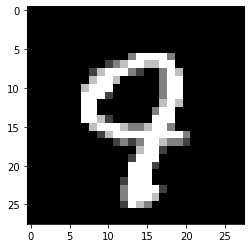

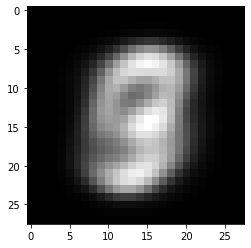

In [70]:
for x,y in train_dataset_ae.take(1):
    plt.imshow(x[0])
    plt.show()
    plt.imshow(dummy_deep_model_ae_2(x)[0])
    plt.show()

In [61]:
dummy_deep_model_ae_2.fit(train_dataset_ae, validation_data = test_dataset_ae, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 958us/step - loss: 0.0707 - val_loss: 0.0708
Epoch 2/20
1875/1875 [==============================] - 2s 935us/step - loss: 0.0705 - val_loss: 0.0707
Epoch 3/20
1875/1875 [==============================] - 2s 942us/step - loss: 0.0704 - val_loss: 0.0706
Epoch 4/20
1875/1875 [==============================] - 2s 944us/step - loss: 0.0703 - val_loss: 0.0704
Epoch 5/20
1875/1875 [==============================] - 2s 929us/step - loss: 0.0702 - val_loss: 0.0703
Epoch 6/20
1875/1875 [==============================] - 2s 941us/step - loss: 0.0700 - val_loss: 0.0702
Epoch 7/20
1875/1875 [==============================] - 2s 945us/step - loss: 0.0700 - val_loss: 0.0701
Epoch 8/20
1875/1875 [==============================] - 2s 921us/step - loss: 0.0699 - val_loss: 0.0701
Epoch 9/20
1875/1875 [==============================] - 2s 937us/step - loss: 0.0698 - val_loss: 0.0700
Epoch 10/20
1875/1875 [==============================] - 2s 950u

In [72]:
input_im = tf.keras.Input(shape=(height, width))
x = tf.keras.layers.Flatten()(input_im)
x = encoder_l1(x)
x = encoder_l2(x)
x = tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal())(x)

encoder_l1.trainable = True

dummy_deep_model_2 = tf.keras.Model(input_im, x)

dummy_deep_model_2.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 250)               196250    
                                                                 
 dense_40 (Dense)            (None, 100)               25100     
                                                                 
 dense_43 (Dense)            (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


In [73]:
dummy_deep_model_2.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics='accuracy')

In [74]:
history_dummy_deep_model_2 = dummy_deep_model_2.fit(train_dataset, validation_data = test_dataset, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3070 - accuracy: 0.1060 - val_loss: 2.3020 - val_accuracy: 0.1009
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3031 - accuracy: 0.1101 - val_loss: 2.3014 - val_accuracy: 0.1194
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2984 - accuracy: 0.1252 - val_loss: 2.2929 - val_accuracy: 0.1602
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2895 - accuracy: 0.1445 - val_loss: 2.2825 - val_accuracy: 0.1200
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2766 - accuracy: 0.1701 - val_loss: 2.2642 - val_accuracy: 0.1813
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2550 - accuracy: 0.1922 - val_loss: 2.2369 - val_accuracy: 0.2252
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2181 - accuracy: 0.2133 - val_loss: 2.1899 - val_accuracy: